## Twitter Semantic Analysis


## Business Objective:
1.	Need to get sentiment analysis of tweets gauge its impact and type
Architecture level analysis.
1.	Data transformation/Text processing using R/Python.
2.	Need to get sentiments Analysis and Emotion mining with some charts like histogram, Density plot, Barplot, pie-plot etc.
3.	Deployment through R Shiny or Flask/ Streamlit.



#### Importing Libraries

In [139]:
!pip install wordcloud

In [140]:
!pip install textblob

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import re
import string
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')


In [142]:
tweet_df = pd.read_csv('tweet.csv')
tweet_df.shape

(81408, 2)

So we have 81408 tweets in our dataset

### EDA

#### **Understanding Basic Statistics**

In [143]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


We don't have any null values in our dataset

In [144]:
tweet_df.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

In [145]:
tweet_df.describe()

tweets       class
count                                               81408       81408
unique                                              67997           4
top     $$$=&gt;&gt; #peace #love #freedom\n#fight for...  figurative
freq                                                   14       21238

In [146]:
# Find the total number of duplicates
total_duplicates = tweet_df.duplicated().sum()

print("Total duplicates:", total_duplicates)

Total duplicates: 49


#### **Class Distribution**

In [147]:
tweet_df2 = tweet_df.drop_duplicates()
tweet_df2.count()


tweets    81359
class     81359
dtype: int64

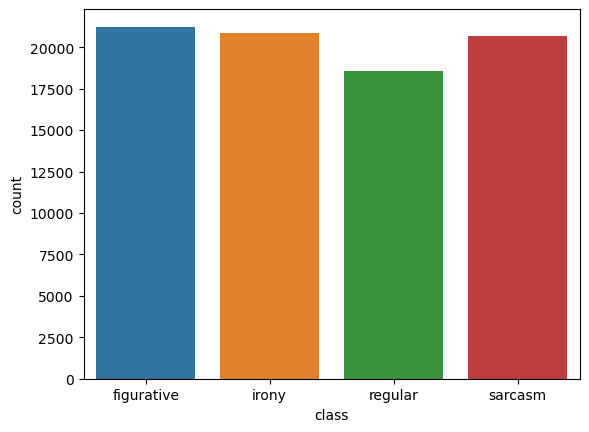

In [148]:
sns.countplot(x= 'class', data = tweet_df2)
plt.show()

#### **Word Clouds**

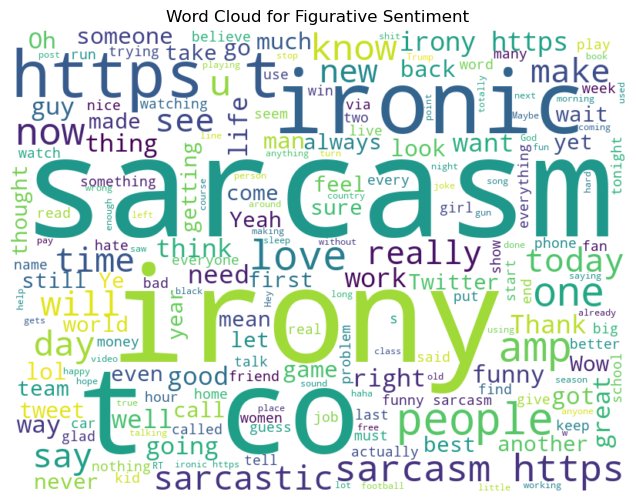

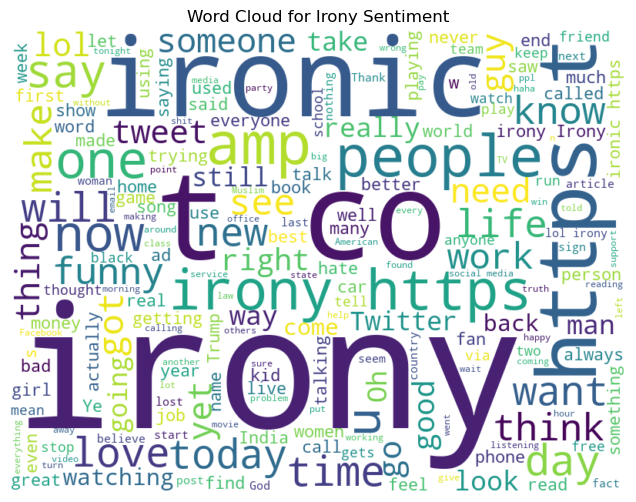

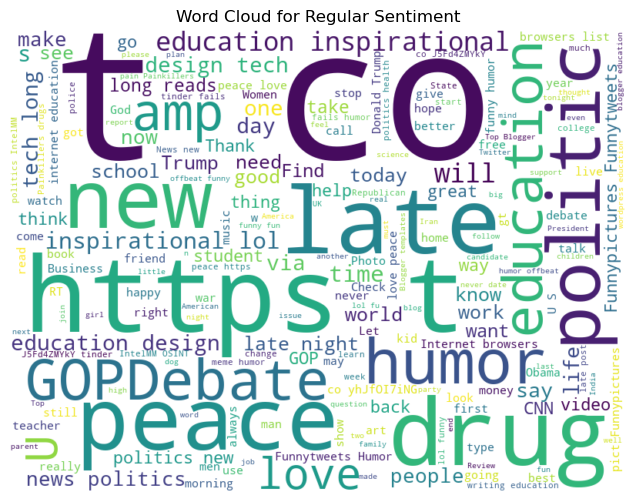

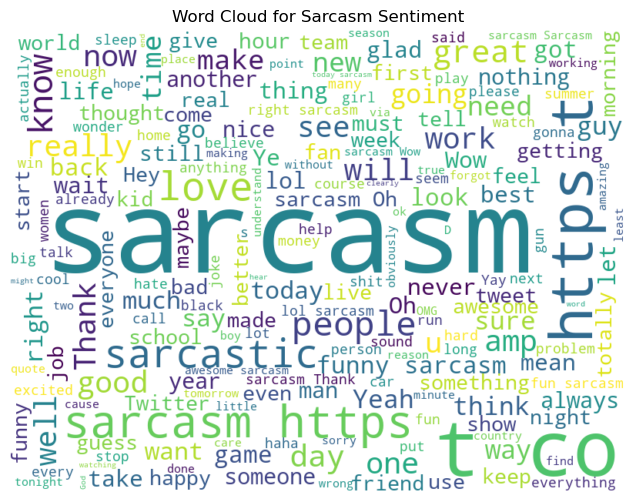

In [149]:
# Unique sentiment classes
unique_sentiments = tweet_df2['class'].unique()

# Generate word clouds for each sentiment class
for sentiment in unique_sentiments:
    text = ' '.join(tweet_df2[tweet_df2['class'] == sentiment]['tweets'])

    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

In [150]:
tweet_df3 = tweet_df2.copy()

**Word Frequencies**

In [151]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [152]:
# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

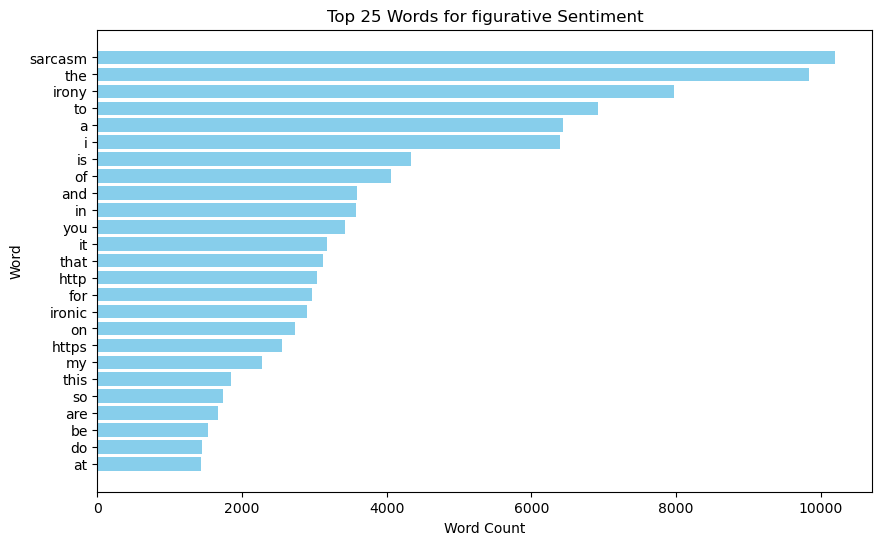

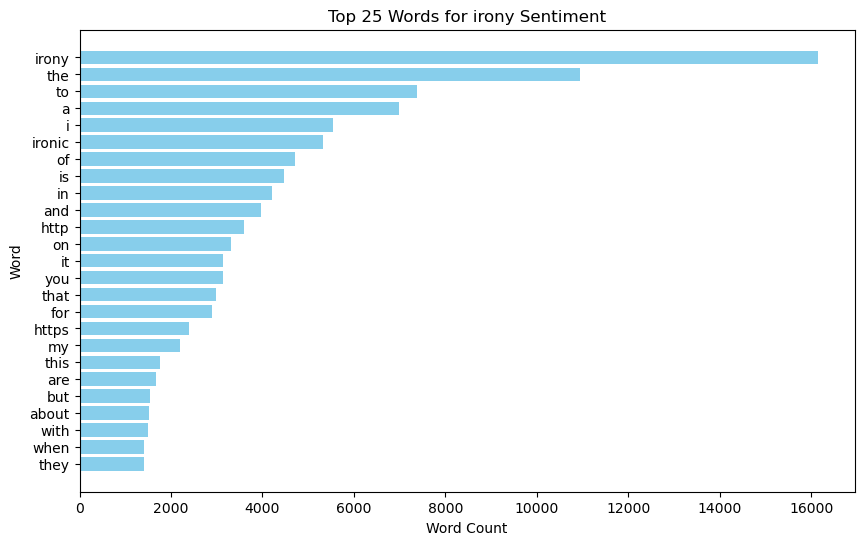

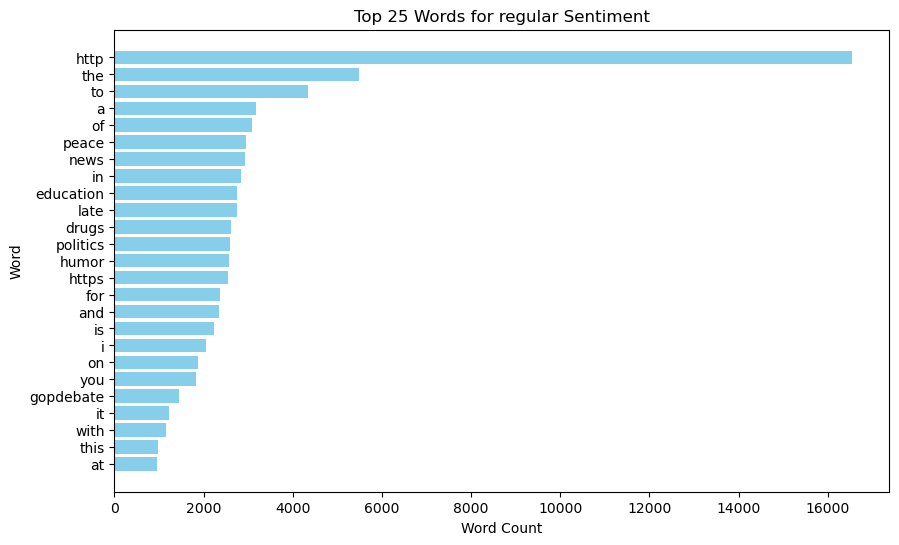

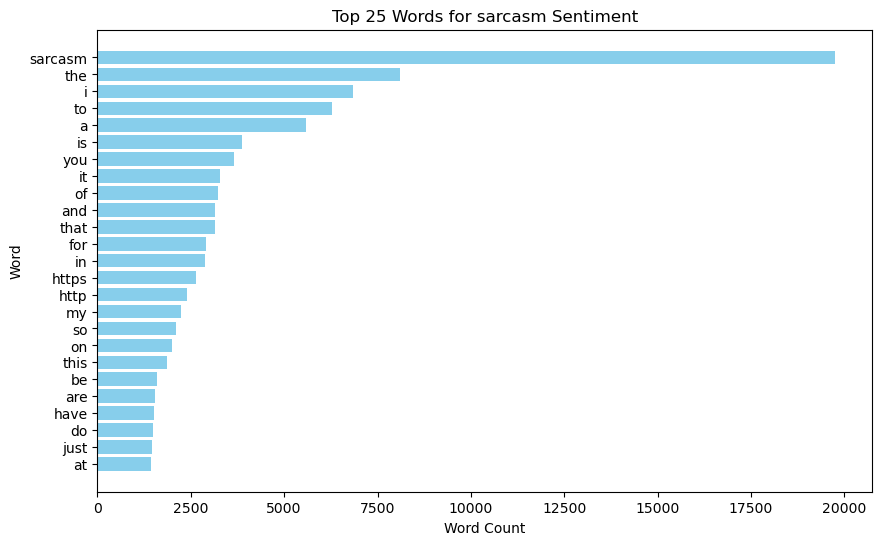

In [153]:
# Plot the top 25 words for each sentiment class
for sentiment_class, word_counts in word_counts_by_class.items():
    common_words = word_counts.most_common(25)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Word Count')
    plt.ylabel('Word')
    plt.title(f'Top 25 Words for {sentiment_class} Sentiment')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most common words at the top
    plt.show()

**Tweet Length Analysis**

In [154]:
# length of each tweet in terms of characters
tweet_df2['char_length'] = tweet_df2['tweets'].apply(len)

# length of each tweet in terms of words
tweet_df2['word_length'] = tweet_df2['tweets'].apply(lambda x: len(x.split()))

# Group by sentiment class and calculate statistics
class_length_stats = tweet_df2.groupby('class')[['char_length', 'word_length']].describe()

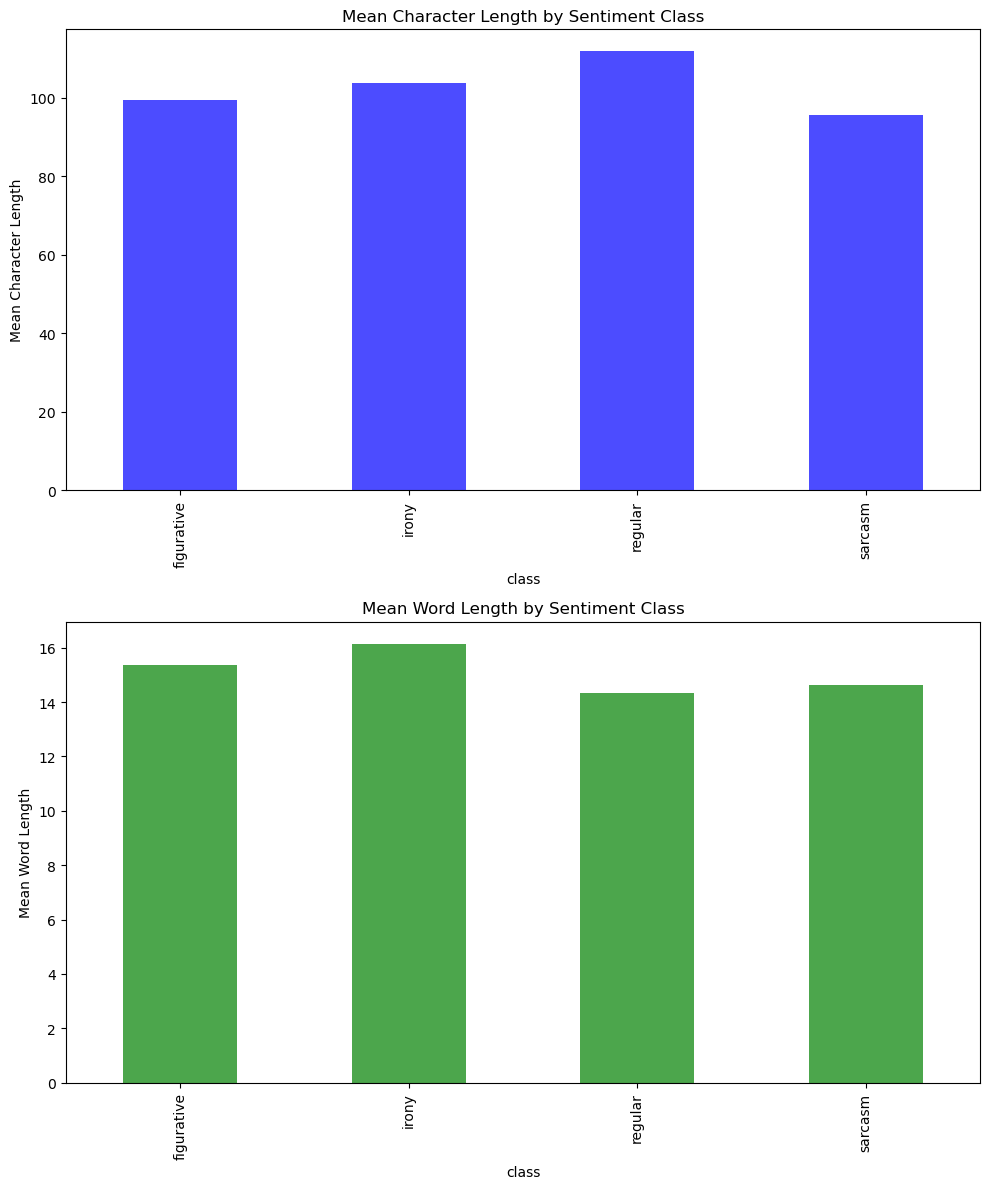

In [155]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Bar plot for character length
class_length_stats['char_length']['mean'].plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_ylabel('Mean Character Length')
axes[0].set_title('Mean Character Length by Sentiment Class')

# Bar plot for word length
class_length_stats['word_length']['mean'].plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_ylabel('Mean Word Length')
axes[1].set_title('Mean Word Length by Sentiment Class')

plt.tight_layout()
plt.show()

**Hashtag and Mention Analysis**

In [156]:
tweet_df4 = tweet_df3.copy()

In [157]:
# Function to extract hashtags and mentions from a tweet
def extract_hashtags_mentions(tweet):
    hashtags = re.findall(r'#\w+', tweet)
    mentions = re.findall(r'@\w+', tweet)
    return hashtags, mentions

# Apply the extraction function to the 'tweets' column
tweet_df3['hashtags'], tweet_df3['mentions'] = zip(*tweet_df3['tweets'].apply(extract_hashtags_mentions))

# Flatten the list of hashtags and mentions
all_hashtags = [tag for tags in tweet_df3['hashtags'] for tag in tags]
all_mentions = [mention for mentions in tweet_df3['mentions'] for mention in mentions]

# Calculate the frequency of each hashtag and mention
hashtag_freq = pd.Series(all_hashtags).value_counts()
mention_freq = pd.Series(all_mentions).value_counts()



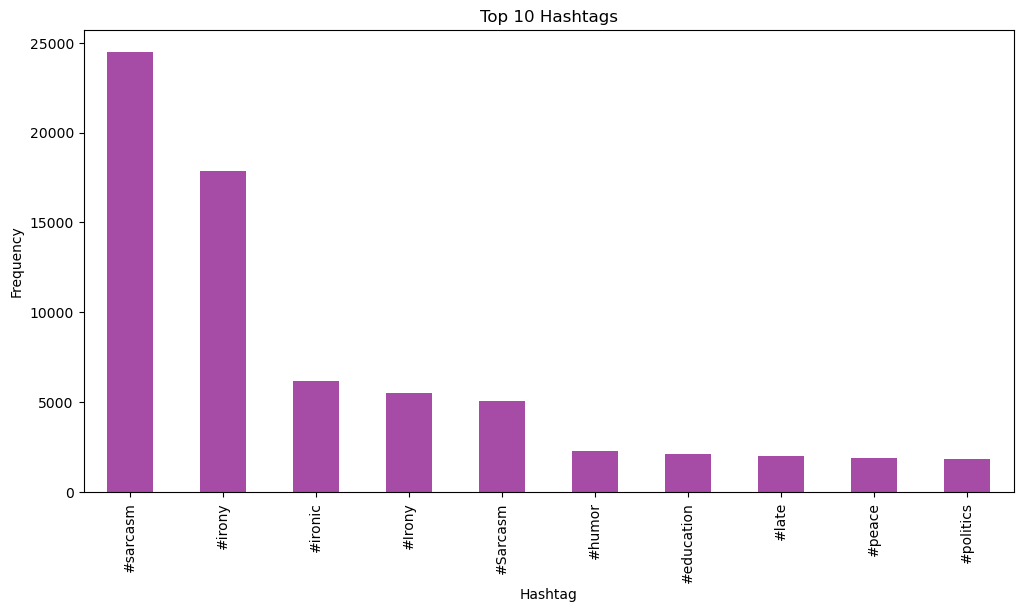

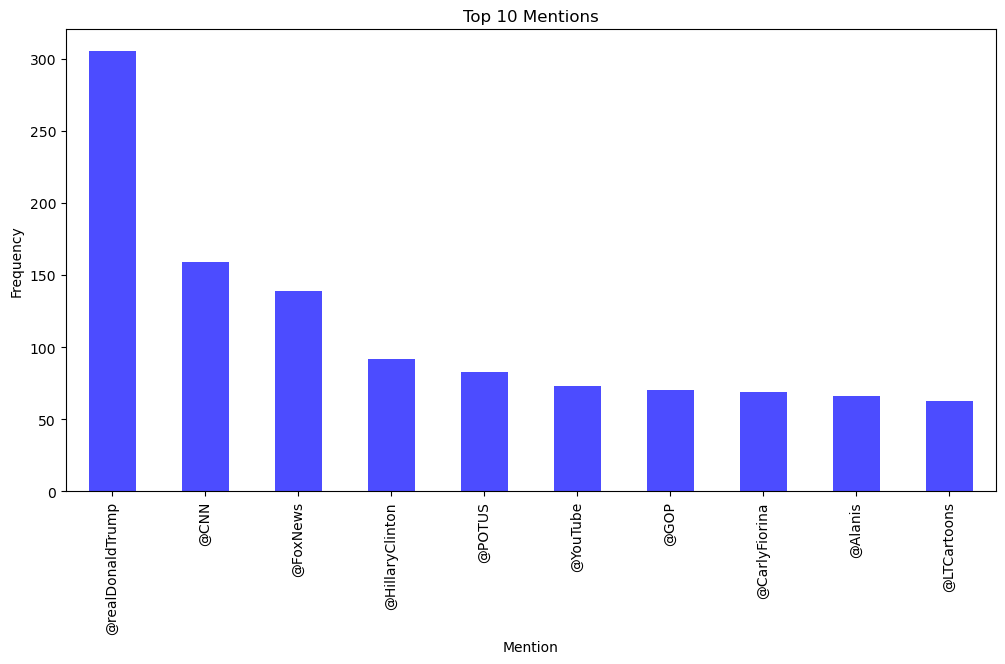

In [158]:
# Group by sentiment class and calculate statistics for hashtags and mentions
class_hashtag_stats = tweet_df3.groupby('class')['hashtags'].apply(lambda x: [tag for tags in x for tag in tags]).apply(pd.Series).stack().value_counts()
class_mention_stats = tweet_df3.groupby('class')['mentions'].apply(lambda x: [mention for mentions in x for mention in mentions]).apply(pd.Series).stack().value_counts()

# Plot the analysis for hashtags
plt.figure(figsize=(12, 6))
hashtag_freq[:10].plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 Hashtags')
plt.show()

# Plot the analysis for mentions
plt.figure(figsize=(12, 6))
mention_freq[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Mention')
plt.ylabel('Frequency')
plt.title('Top 10 Mentions')
plt.show()

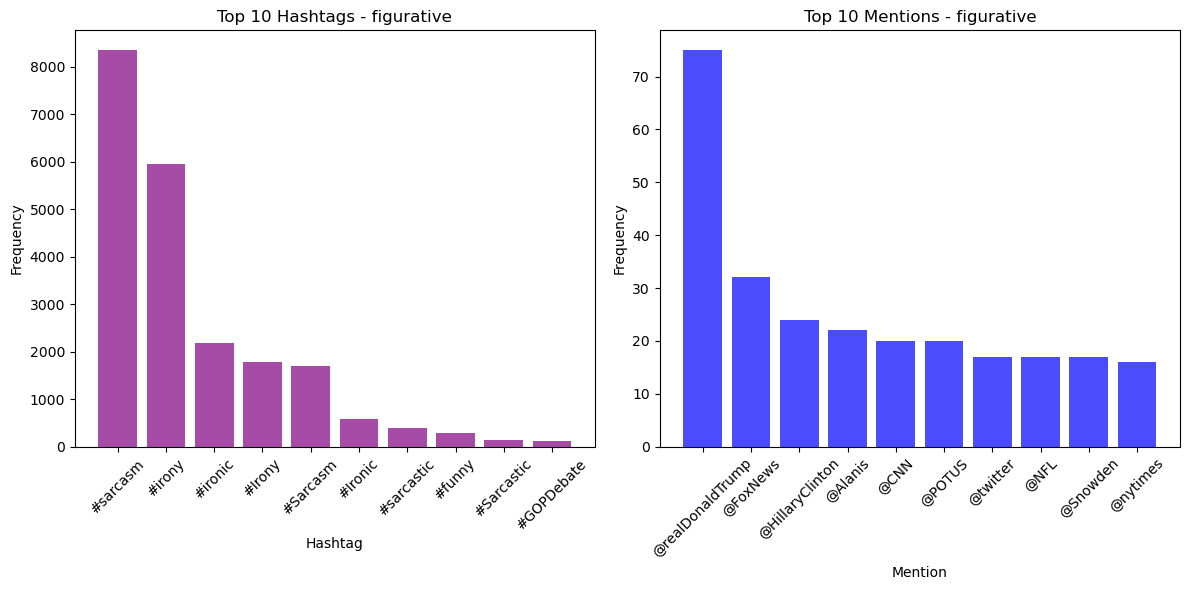

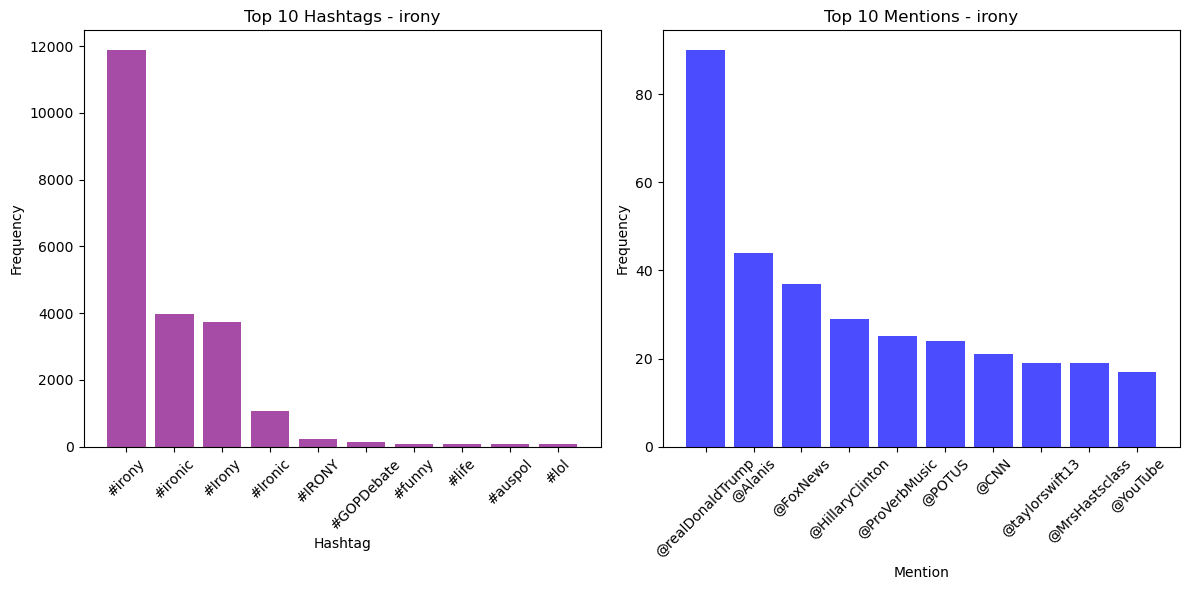

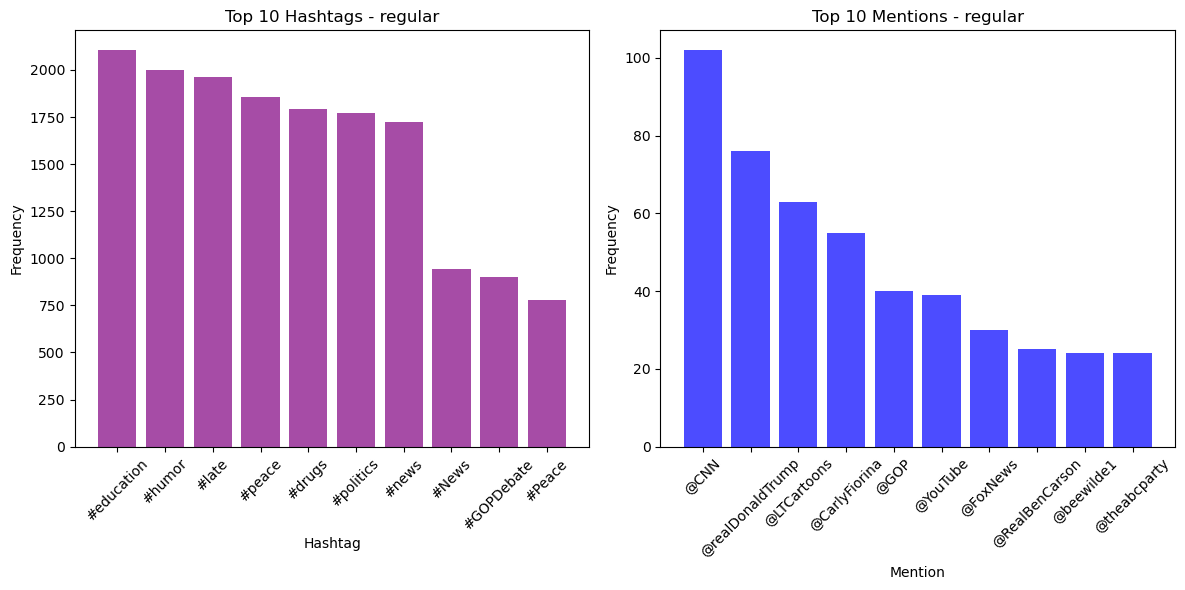

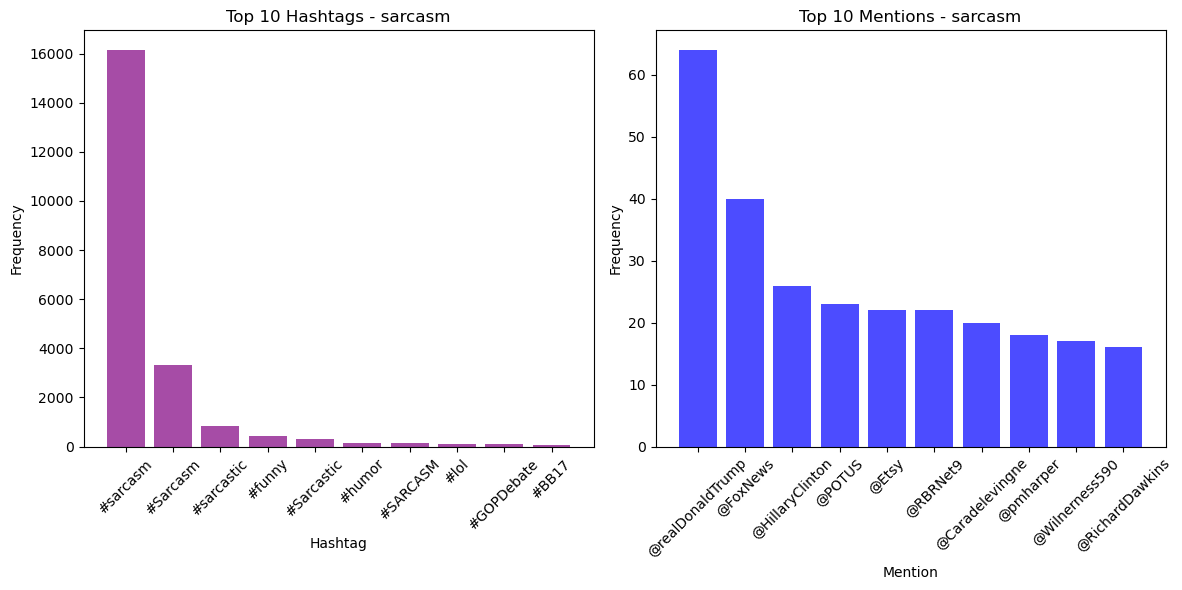

In [159]:
from collections import Counter

# Count hashtag and mention frequencies for each sentiment class
hashtag_counts_by_class = {}
mention_counts_by_class = {}

for sentiment_class in tweet_df['class'].unique():
    class_tweets = tweet_df3[tweet_df3['class'] == sentiment_class]['hashtags']
    class_hashtags = [tag for tags in class_tweets for tag in tags]
    hashtag_counts_by_class[sentiment_class] = Counter(class_hashtags)

    class_mentions = tweet_df3[tweet_df3['class'] == sentiment_class]['mentions']
    class_mentions = [mention for mentions in class_mentions for mention in mentions]
    mention_counts_by_class[sentiment_class] = Counter(class_mentions)

# Plot the top 10 hashtags and mentions for each sentiment class
for sentiment_class in tweet_df3['class'].unique():
    top_hashtags = hashtag_counts_by_class[sentiment_class].most_common(10)
    top_mentions = mention_counts_by_class[sentiment_class].most_common(10)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    hashtags, counts = zip(*top_hashtags)
    plt.bar(hashtags, counts, color='purple', alpha=0.7)
    plt.xlabel('Hashtag')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Hashtags - {sentiment_class}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    mentions, counts = zip(*top_mentions)
    plt.bar(mentions, counts, color='blue', alpha=0.7)
    plt.xlabel('Mention')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Mentions - {sentiment_class}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

**Sentiment Scores and Patterns**

In [160]:
tweet_df5 = tweet_df4.copy()

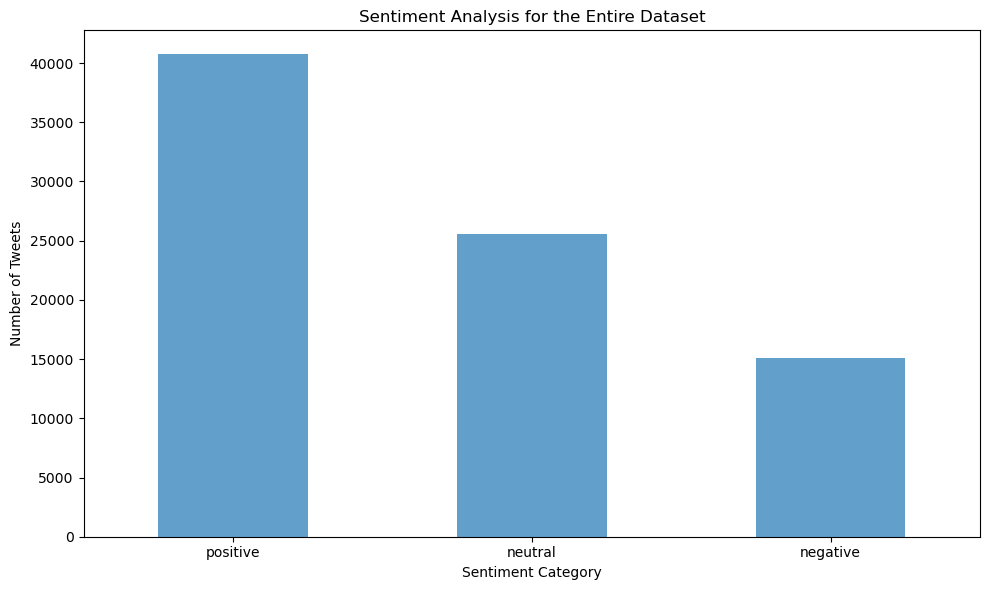

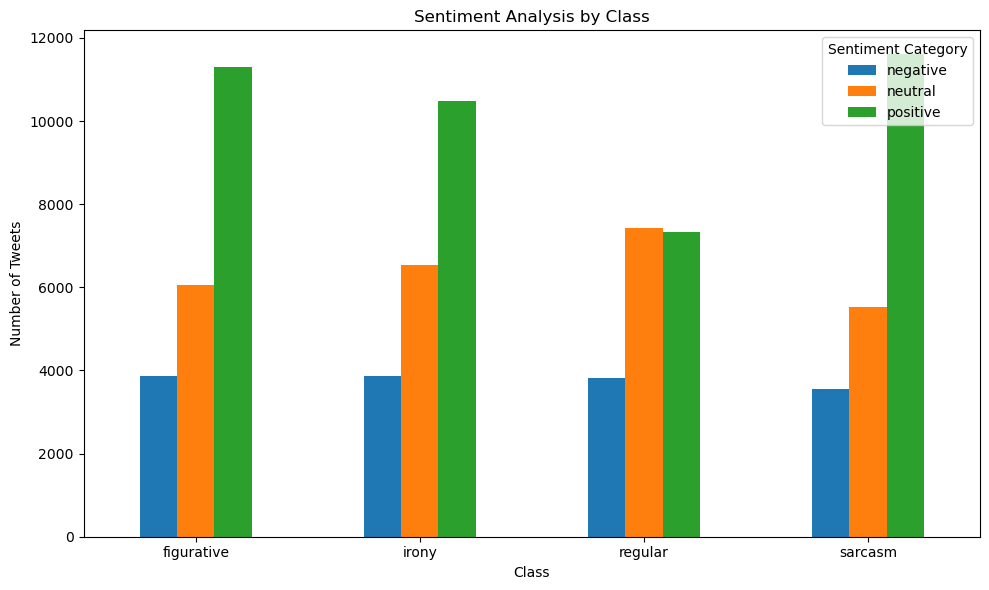

In [161]:
# Calculate sentiment scores for each tweet using TextBlob
tweet_df4['sentiment_score'] = tweet_df4['tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

tweet_df4['sentiment_category'] = tweet_df4['sentiment_score'].apply(categorize_sentiment)

# Visualize sentiment analysis for the entire dataset
plt.figure(figsize=(10, 6))
tweet_df4['sentiment_category'].value_counts().plot(kind='bar', alpha=0.7)
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis for the Entire Dataset')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualize sentiment analysis for each class
class_sentiment_counts = tweet_df4.groupby(['class', 'sentiment_category']).size().unstack(fill_value=0)
class_sentiment_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Class')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis by Class')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Sentiment Category')
plt.show()

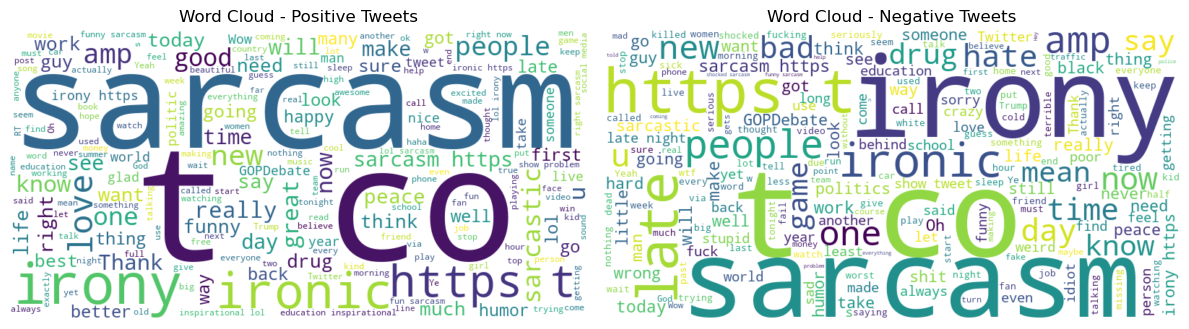

In [162]:
# Separate positive and negative tweets based on sentiment scores
positive_tweets = tweet_df4[tweet_df4['sentiment_score'] > 0]['tweets']
negative_tweets = tweet_df4[tweet_df4['sentiment_score'] < 0]['tweets']

# Combine positive and negative tweets into a single text for analysis
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

# Create WordClouds for positive and negative tweets
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Tweets')
plt.axis('off')

plt.tight_layout()
plt.show()

By comparing the WordClouds side by side, we can easily spot the differences in word frequencies between positive and negative tweets.

**Data Preprocessing**

In [163]:
tweet_df6=tweet_df5.copy()

In [164]:
tweet_df5.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

In [165]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [166]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [167]:
!pip install pandas scikit-learn openpyxl

In [168]:
pattern = r'@[\w]+'

# Remove person names from each tweet
tweet_df5['cleaned_tweets'] = tweet_df5['tweets'].apply(lambda tweet: re.sub(pattern, '', tweet))

In [169]:
def clean(tweet): 
  

    # Special characters
    
    tweet = re.sub(r'^\d+$', "", tweet)
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    #emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    tweet =  emoji_pattern.sub(r'', tweet)
    
    # usernames mentions like "@abc123"
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    tweet =  ment.sub(r'', tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&amp;", "&", tweet)
    tweet =re.sub(r'^\d+$','',tweet)
    # html tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    tweet = re.sub(html, '', tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'https?://\S+|www\.\S+','', tweet)
        
    #Punctuations and special characters
    
    tweet = re.sub('[%s]' % re.escape(string.punctuation),'',tweet)
    
    tweet = tweet.lower()
    
    splits = tweet.split()
    splits = [word for word in splits if word not in set(nltk.corpus.stopwords.words('english'))]
    tweet = ' '.join(splits)
    
    
    return tweet


In [170]:
tweet_df5['cleaned_tweets']=tweet_df5['cleaned_tweets'].apply(clean)

In [171]:
tweet_df5.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                      cleaned_tweets  
0  aware dirty step get money staylight staywhite...  
1            sarcasm people understand diy artattack  
2  dailymail readers sensible always shocker sarc...  
3                     get feeling like games sarcasm  
4                     probably missed text sarcastic

(-1.110082828346458,
 1.1081469321122612,
 -1.1097799068560694,
 1.1270269442497949)

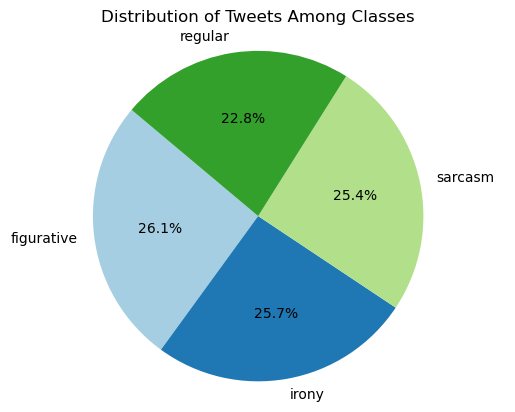

In [172]:
#Data Visualization

class_count=tweet_df5['class'].value_counts()

plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Tweets Among Classes')
plt.axis('equal')

In [173]:
def remove_stopword(x):
    from nltk.corpus import stopwords
    return [y for y in x if y not in stopwords.words('english')]

In [174]:
tweet_df5['cleaned_tweets'] = tweet_df5['cleaned_tweets'].apply(lambda x:str(x).split())
tweet_df5['cleaned_tweets'] = tweet_df5['cleaned_tweets'].apply(remove_stopword)

In [175]:
def lemmatize_text(text):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)  # Tokenize the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

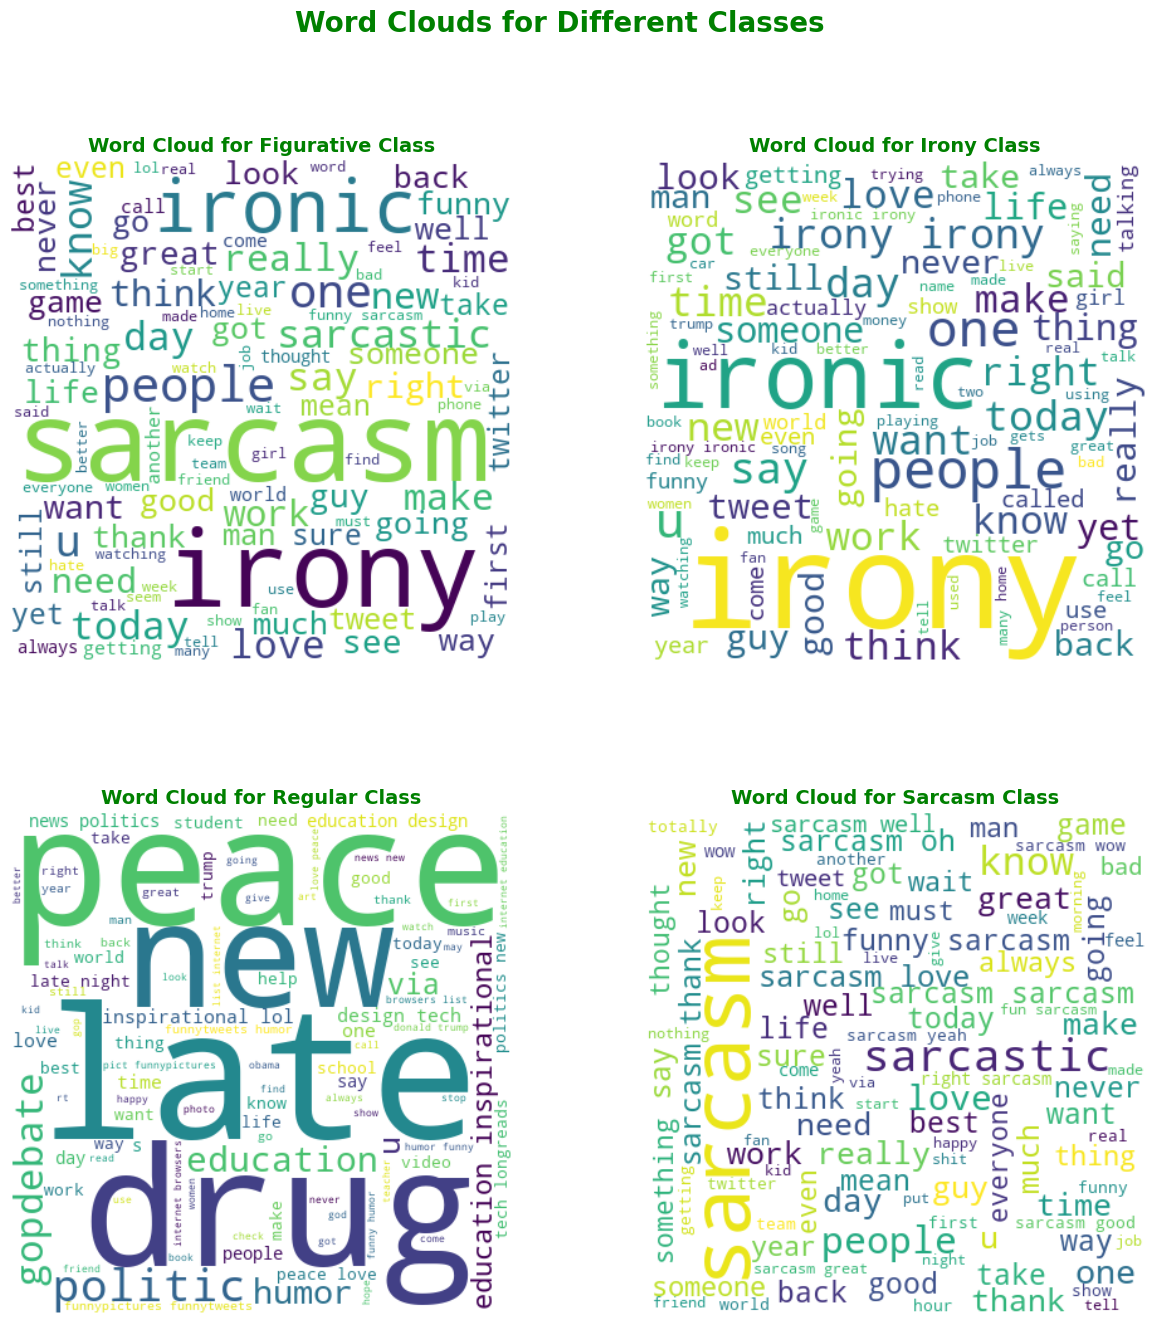

In [176]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the classes
classes = ['figurative', 'irony', 'regular', 'sarcasm']

# Create subplots for each class
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Word Clouds for Different Classes", fontsize=20, fontweight='bold', color='green')

for i, class_name in enumerate(classes):
    # Filter the DataFrame for the current class
    class_df = tweet_df5[tweet_df5['class'] == class_name]
    
    # Combine all tweets into a single text
    text = ' '.join(' '.join(tweet) for tweet in class_df['cleaned_tweets'])
    
    # Generate the word cloud
    wc = WordCloud(width=400, height=400, max_words=100, background_color='white').generate(text)
    
    # Plot the word cloud in the corresponding subplot
    row = i // 2
    col = i % 2
    axes[row, col].imshow(wc, interpolation='bilinear')
    axes[row, col].set_title(f"Word Cloud for {class_name.capitalize()} Class", fontsize=14, fontweight='bold', color='green')
    axes[row, col].axis('off')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

#### Unigram Analysis and Vizualization

In [177]:
!pip install XlsxWriter

In [178]:
from collections import Counter
import pandas as pd

# Count the frequency of words in 'cleaned_tweets' column
top = Counter([item for sublist in tweet_df5['cleaned_tweets'] for item in sublist])

# Create a DataFrame from the most common words
temp = pd.DataFrame(top.most_common())
temp.columns = ['Unigram', 'Frequency']

# Define the path for the Excel file
excel_file_path = r"C:\\Users\\Rahul\\Desktop\\DS_Project\\Ngram_frequencies.xlsx"

# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter(excel_file_path, engine='xlsxwriter')

# Convert the DataFrame to an XlsxWriter Excel object
temp.to_excel(writer, index=False, sheet_name='Unigrams')

# Get the xlsxwriter workbook and worksheet objects
workbook = writer.book
worksheet = writer.sheets['Unigrams']

# Add a conditional format to the 'Frequency' column for background gradient
format1 = workbook.add_format({'bg_color': '#DDEBF7', 'border': 1})
worksheet.conditional_format('B2:B{}'.format(len(temp) + 1), {'type': '2_color_scale', 'min_color': '#FFFFFF', 'max_color': '#63C384'})

# Close the Pandas Excel writer and output the Excel file
writer.save()

print(f"DataFrame saved as {excel_file_path}")


DataFrame saved as C:\\Users\\Rahul\\Desktop\\DS_Project\\Ngram_frequencies.xlsx


In [179]:
from collections import Counter
import pandas as pd

# Function to extract bigrams from a list of words
def extract_bigrams(tokens):
    return [(tokens[i], tokens[i+1]) for i in range(len(tokens) - 1)]

# Count the frequency of bigrams in 'cleaned_tweets' column
bigrams = [bigram for sublist in tweet_df5['cleaned_tweets'].apply(extract_bigrams) for bigram in sublist]
top_bigrams = Counter(bigrams)

# Create a DataFrame from the most common bigrams
temp_bigrams = pd.DataFrame(top_bigrams.most_common())
temp_bigrams.columns = ['Bigram', 'Frequency']

# Define the path for the Excel file for bigrams
excel_file_path_bigrams = r"C:\\Users\\Rahul\\Desktop\\DS_Project\\Ngram_frequencies.xlsx"

# Create a Pandas Excel writer using XlsxWriter as the engine for bigrams
writer_bigrams = pd.ExcelWriter(excel_file_path_bigrams, engine='xlsxwriter')

# Convert the DataFrame of bigrams to an XlsxWriter Excel object
temp_bigrams.to_excel(writer_bigrams, index=False, sheet_name='Bigrams')

# Get the xlsxwriter workbook and worksheet objects for bigrams
workbook_bigrams = writer_bigrams.book
worksheet_bigrams = writer_bigrams.sheets['Bigrams']

# Add a conditional format to the 'Frequency' column for background gradient for bigrams
format1_bigrams = workbook_bigrams.add_format({'bg_color': '#DDEBF7', 'border': 1})
worksheet_bigrams.conditional_format('B2:B{}'.format(len(temp_bigrams) + 1), {'type': '2_color_scale', 'min_color': '#FFFFFF', 'max_color': '#63C384'})

# Close the Pandas Excel writer for bigrams and output the Excel file
writer_bigrams.save()

print(f"Bigrams DataFrame saved as {excel_file_path_bigrams}")

Bigrams DataFrame saved as C:\\Users\\Rahul\\Desktop\\DS_Project\\Ngram_frequencies.xlsx


In [180]:
from collections import Counter
import pandas as pd

# Function to extract trigrams from a list of words
def extract_trigrams(tokens):
    return [(tokens[i], tokens[i+1], tokens[i+2]) for i in range(len(tokens) - 2)]

# Count the frequency of trigrams in 'cleaned_tweets' column
trigrams = [trigram for sublist in tweet_df5['cleaned_tweets'].apply(extract_trigrams) for trigram in sublist]
top_trigrams = Counter(trigrams)

# Create a DataFrame from the most common trigrams
temp_trigrams = pd.DataFrame(top_trigrams.most_common())
temp_trigrams.columns = ['Trigram', 'Frequency']

# Define the path for the Excel file for trigrams
excel_file_path_trigrams = r"C:\\Users\\Rahul\\Desktop\\DS_Project\\Unigram_frequencies.xlsx"

# Create a Pandas Excel writer using XlsxWriter as the engine for trigrams
writer_trigrams = pd.ExcelWriter(excel_file_path_trigrams, engine='xlsxwriter')

# Convert the DataFrame of trigrams to an XlsxWriter Excel object
temp_trigrams.to_excel(writer_trigrams, index=False, sheet_name='Trigrams')

# Get the xlsxwriter workbook and worksheet objects for trigrams
workbook_trigrams = writer_trigrams.book
worksheet_trigrams = writer_trigrams.sheets['Trigrams']

# Add a conditional format to the 'Frequency' column for background gradient for trigrams
format1_trigrams = workbook_trigrams.add_format({'bg_color': '#DDEBF7', 'border': 1})
worksheet_trigrams.conditional_format('B2:B{}'.format(len(temp_trigrams) + 1), {'type': '2_color_scale', 'min_color': '#FFFFFF', 'max_color': '#63C384'})

# Close the Pandas Excel writer for trigrams and output the Excel file
writer_trigrams.save()

print(f"Trigrams DataFrame saved as {excel_file_path_trigrams}")

Trigrams DataFrame saved as C:\\Users\\Rahul\\Desktop\\DS_Project\\Unigram_frequencies.xlsx


In [181]:
tweet_df5.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                      cleaned_tweets  
0  [aware, dirty, step, get, money, staylight, st...  
1      [sarcasm, people, understand, diy, artattack]  
2  [dailymail, readers, sensible, always, shocker...  
3               [get, feeling, like, games, sarcasm]  
4                [probably, missed, text, sarcastic]

**Reducing the size of the dataset for easy Computation**

In [182]:
tweet_df5['cleaned_tweets'].head()

0    [aware, dirty, step, get, money, staylight, st...
1        [sarcasm, people, understand, diy, artattack]
2    [dailymail, readers, sensible, always, shocker...
3                 [get, feeling, like, games, sarcasm]
4                  [probably, missed, text, sarcastic]
Name: cleaned_tweets, dtype: object

In [186]:
sample_df = tweet_df5.sample(n=10000, random_state=42)

In [187]:
class_count=sample_df['class'].value_counts()
class_count

irony         2626
figurative    2580
sarcasm       2549
regular       2245
Name: class, dtype: int64

In [188]:
# Define the path for the Excel file
excel_file_path = r"C:\\Users\\Rahul\\Desktop\\DS_Project\\sample_tweet_data.xlsx"

# Write the DataFrame to the Excel file
sample_df.to_excel(excel_file_path, index=False)

print(f"DataFrame saved as {excel_file_path}")

DataFrame saved as C:\\Users\\Rahul\\Desktop\\DS_Project\\sample_tweet_data.xlsx
